In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
link='https://raw.githubusercontent.com/eijaz1/Deep-Learning-in-Keras-Tutorial/master/data/diabetes_data.csv'
df=pd.read_csv(link,sep=',')
df.head()


,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


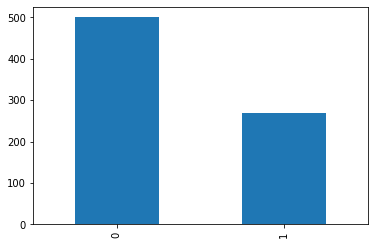

In [36]:
df['diabetes'].value_counts().plot(kind='bar') #1= diabetes  0= not diabetes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        768 non-null int64
insulin        768 non-null int64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
#df.describe()
df.isna().any().sum()

0

In [37]:
X=df.drop(columns=['diabetes'])


In [40]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

In [61]:
#one-hot encode target column
y = to_categorical(df.diabetes)

#vcheck that target column has been converted
y[0:4]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [64]:

model_2 = Sequential()

#get number of columns in training data
n_cols_2 = X.shape[1]

#add layers to model
model_2.add(Dense(250, activation='relu', input_shape=(n_cols_2,)))
model_2.add(Dense(250, activation='relu'))
model_2.add(Dense(250, activation='relu'))
model_2.add(Dense(2, activation='softmax'))

#compile model using accuracy to measure model performance
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=5)

In [65]:
#train model
model_2.fit(X, y, epochs=30, validation_split=0.2, callbacks=[early_stopping_monitor])

Train on 614 samples, validate on 154 samples
Epoch 1/30
614/614 [==============================] - 0s 576us/step - loss: 4.1194 - accuracy: 0.5505 - val_loss: 1.5685 - val_accuracy: 0.6429
Epoch 2/30
614/614 [==============================] - 0s 249us/step - loss: 0.9192 - accuracy: 0.6384 - val_loss: 0.6638 - val_accuracy: 0.6494
Epoch 3/30
614/614 [==============================] - 0s 407us/step - loss: 0.6185 - accuracy: 0.6938 - val_loss: 0.8186 - val_accuracy: 0.6623
Epoch 4/30
614/614 [==============================] - 0s 456us/step - loss: 0.6542 - accuracy: 0.6580 - val_loss: 0.7958 - val_accuracy: 0.6623
Epoch 5/30
614/614 [==============================] - 0s 584us/step - loss: 0.7595 - accuracy: 0.6710 - val_loss: 2.1266 - val_accuracy: 0.3766
Epoch 6/30
614/614 [==============================] - 0s 321us/step - loss: 1.1186 - accuracy: 0.6140 - val_loss: 1.0381 - val_accuracy: 0.4610
Epoch 7/30
614/614 [==============================] - 0s 366us/step - loss: 0.7587 - accur

In [67]:
pred=model_2.predict(X)

In [68]:
pred[:8]

array([[0.25088677, 0.74911326],
       [0.69038   , 0.30962008],
       [0.06794783, 0.93205214],
       [0.5518002 , 0.44819984],
       [0.04161902, 0.958381  ],
       [0.39888695, 0.601113  ],
       [0.34925818, 0.6507419 ],
       [0.09846053, 0.90153944]], dtype=float32)